### Tensor
- MNIST : 3차원(1, 28, 28)

### 3. 파이토치 기초

In [1]:
import torch

In [2]:
def print_val(val):
  print("Type : ", type(val))
  print("Shape : ", val.shape)
  print("값 : \n", val)
  print(" ") 

In [3]:
# uniform : 0 ~ 1 사이 모든 값들이 나올 확률이 같음
x = torch.rand(2, 3, 2)
print_val(x)

# Gaussian : 0을 평균으로 하는 가우시안 분포를 따르는 랜덤값
# normal distribution
x = torch.randn(2, 3)
print_val(x)

Type :  <class 'torch.Tensor'>
Shape :  torch.Size([2, 3, 2])
값 : 
 tensor([[[0.2503, 0.4412],
         [0.0139, 0.9118],
         [0.2079, 0.3154]],

        [[0.2142, 0.6132],
         [0.7347, 0.8580],
         [0.8298, 0.1305]]])
 
Type :  <class 'torch.Tensor'>
Shape :  torch.Size([2, 3])
값 : 
 tensor([[-0.5183, -1.6185,  0.3259],
        [-1.8860,  0.9430,  3.0617]])
 


In [4]:
# 0 ~ n-1 까지 값을 원소로 갖는 배열 -> 랜덤 배열
# permute 이므로 0에서 3까지 숫자 중 하나씩을 넣어준다.
x = torch.randperm(4)
print_val(x)

Type :  <class 'torch.Tensor'>
Shape :  torch.Size([4])
값 : 
 tensor([3, 1, 2, 0])
 


In [5]:
# [start, end] 구간을 step 단위로 나눠서 배열로 생성
x = torch.arange(0, 3, step=0.5)
print_val(x)

Type :  <class 'torch.Tensor'>
Shape :  torch.Size([6])
값 : 
 tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])
 


In [6]:
# 3행 4열의 matrix 를 만들고 이를 1로 채운다. / 0으로 채운다.
print_val(torch.ones(3, 4))
print_val(torch.zeros(3, 4))

Type :  <class 'torch.Tensor'>
Shape :  torch.Size([3, 4])
값 : 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
 
Type :  <class 'torch.Tensor'>
Shape :  torch.Size([3, 4])
값 : 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
 


In [7]:
# (2, 4) shape 으로 tensor 하나 만들어줘
print_val(torch.Tensor(2, 4))

Type :  <class 'torch.Tensor'>
Shape :  torch.Size([2, 4])
값 : 
 tensor([[2.4858e+27, 3.0787e-41, 3.7835e-44, 0.0000e+00],
        [       nan, 0.0000e+00, 1.3733e-14, 6.4069e+02]])
 


In [8]:
# shape 과 num까지 지정해줌
print_val(torch.Tensor([2, 3]))
print_val(torch.Tensor([[2, 3], [3, 4]]))

Type :  <class 'torch.Tensor'>
Shape :  torch.Size([2])
값 : 
 tensor([2., 3.])
 
Type :  <class 'torch.Tensor'>
Shape :  torch.Size([2, 2])
값 : 
 tensor([[2., 3.],
        [3., 4.]])
 


In [9]:
# 텐서 타입 변환
x = torch.FloatTensor(2, 3)
print_val(x)

x = x.type_as(torch.IntTensor())
print_val(x)

Type :  <class 'torch.Tensor'>
Shape :  torch.Size([2, 3])
값 : 
 tensor([[2.4858e+27, 3.0787e-41, 3.0000e+00],
        [4.0000e+00,        nan, 0.0000e+00]])
 
Type :  <class 'torch.Tensor'>
Shape :  torch.Size([2, 3])
값 : 
 tensor([[-2147483648,           0,           3],
        [          4, -2147483648,           0]], dtype=torch.int32)
 


In [10]:
# 텐서 크기 반환
torch.FloatTensor(3, 4, 5).size()

torch.Size([3, 4, 5])

In [11]:
# numpy array -> torch tensor
import numpy as np
np_x = np.ndarray((2, 3), dtype=int)
print_val(np_x)

x = torch.from_numpy(np_x)
print_val(x)

Type :  <class 'numpy.ndarray'>
Shape :  (2, 3)
값 : 
 [[94362260916144              0              0]
 [             0              0              0]]
 
Type :  <class 'torch.Tensor'>
Shape :  torch.Size([2, 3])
값 : 
 tensor([[94362260916144,              0,              0],
        [             0,              0,              0]])
 


### (4) MNIST 데이터 로드

### (4-0) MNIST는 어떻게 생겼나?

In [12]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
60000
mnist_train 길이 :  60000
5
torch.Size([1, 28, 28])


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


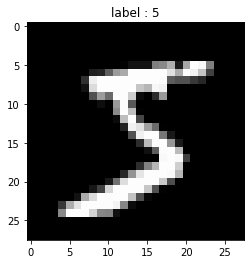

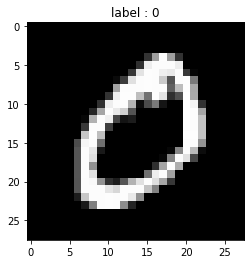

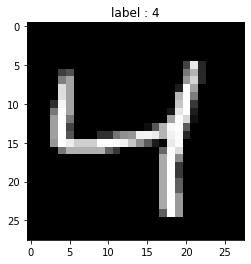

In [13]:
# 1. MNIST 로드
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)

# 2. 그려보기
# MNIST data 하나 형태 출력
image, label = mnist_train.__getitem__(0)
print(image.size(), label)

image, label = mnist_train[1]
print(image.size(), label)

print(mnist_train.__len__())
print("mnist_train 길이 : ", len(mnist_train))

# 3. 그리기
print(mnist_train[0][1]) # label
print(mnist_train[0][0].size()) # image

for i in range(3):
  img = mnist_train[i][0].numpy() # image 타입을 numpy 로 변환 (1, 28, 28)
  plt.title("label : %d" % mnist_train[i][1])
  plt.imshow(img[0], cmap="gray")
  plt.show()


### (4-1) MNIST train, test dataset 가져오기

In [14]:
# train용으로 쓰겠다.
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),
                         target_transform=None, download=True)

# test용으로 쓰겠다. 
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

### (4-2) 대략적인 데이터 형태

mnist_train 길이 :  60000
mnist_test 길이 :  10000
image data 형태 :  torch.Size([1, 28, 28])
label :  5


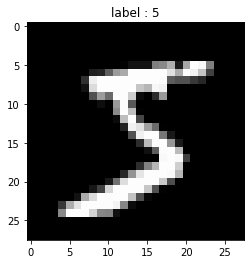

In [15]:
print("mnist_train 길이 : ", len(mnist_train))
print("mnist_test 길이 : ", len(mnist_test))

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0) # 0번째 데이터
print("image data 형태 : ", image.size())
print("label : ", label)

# 그리기
img = image.numpy()
plt.title("label : %d" % label)
plt.imshow(img[0], cmap="gray")
plt.show()

### (4-3) 데이터 로드 함수
- 학습시킬 때 batch_size 단위로 끊어서 로드하기 위함

In [16]:
batch_size = 16

In [17]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size,
                                           # mnist_train 을 트레인 시키자
                                           shuffle=True, num_workers=2,
                                           # batch_size 만큼 나눌 때 나머지는 버려라
                                           drop_last=True)

test_loader = torch.utils.data.DataLoader((mnist_test), batch_size=batch_size,
                                          shuffle=False, num_workers=2,
                                          drop_last=True)

[0]
한번에 로드되는 데이터 크기 :  16
torch.Size([16, 28, 28])
torch.Size([16])


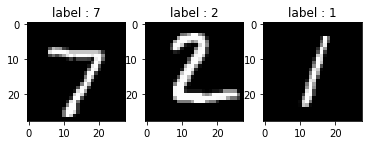

[1]
한번에 로드되는 데이터 크기 :  16
torch.Size([16, 28, 28])
torch.Size([16])


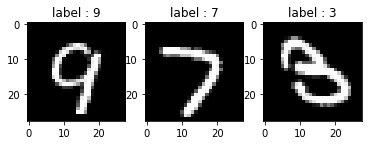

[2]
한번에 로드되는 데이터 크기 :  16
torch.Size([16, 28, 28])
torch.Size([16])


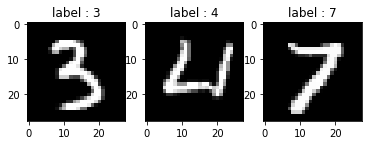

[3]
한번에 로드되는 데이터 크기 :  16
torch.Size([16, 28, 28])
torch.Size([16])


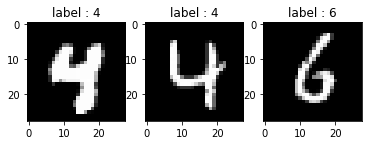

[4]
한번에 로드되는 데이터 크기 :  16
torch.Size([16, 28, 28])
torch.Size([16])


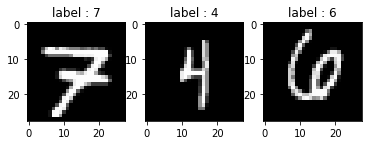

[5]
한번에 로드되는 데이터 크기 :  16
torch.Size([16, 28, 28])
torch.Size([16])


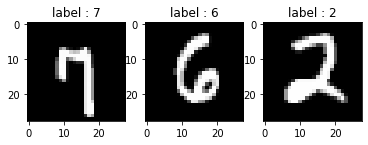

In [18]:
n = 3 # 샘플로 그려볼 데이터 개수
for i, [imgs, labels] in enumerate(test_loader): # batch_size 만큼
  if i > 5:
    break
  
  print("[%d]" % i)
  print("한번에 로드되는 데이터 크기 : ", len(imgs))

  # GPU에 로드되기 위함
  x = Variable(imgs) #.cuda()   # (batch_size, 1, 28, 28)
  x = x.reshape((x.shape[0], x.shape[2], x.shape[3])) # (batch_size, 1, 28, 28) -> (batch_size, 28, 28)
  y_ = Variable(labels) #.cuda()  # (batch_size)

  print(x.shape)
  print(y_.shape)

  # 그리기 
  for j in range(3):
    img = imgs[j].numpy() # image 타입을 numpy 로 변환 (1, 28, 28)
    img = img.reshape((img.shape[1], img.shape[2])) # (1, 28, 28) -> (28, 28)

    plt.subplot(1, n, j+1) # (1, 3) 형태 플랏의 j번째 자리에 그리겠다.
    plt.imshow(img, cmap="gray")
    plt.title("label : %d" % labels[j])
  plt.show()